-----------------------------------------------------------------------------------------------------------------------
# **Employee Attrition Prediction**
-----------------------------------------------------------------------------------------------------------------------

--------------------
## **Context**
--------------------

McCurr Health Consultancy is an MNC that has thousands of employees spread across the globe. The company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources is spent on retaining existing employees through various initiatives. The Head of People Operations wants to bring down the cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition. As a recently hired Data Scientist in the People Operations Department, you have been asked to identify patterns in characteristics of employees who leave the organization. Also, you have to use this information to **predict if an employee is at risk of attrition.** This information will be used to target them with incentives.

-----------------------
## **Objective** 
-----------------------

* To identify the different factors that drive attrition
* To build a model to predict if an employee will attrite or not

------------------------------------
## **Dataset Description**
------------------------------------

The data contains information on employees' demographic details, work-related metrics, and attrition flag.

* **EmployeeNumber** - Unique Employee Identifier
* **Attrition** - Did the employee attrite or not?
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Data description not available
* **Department** - Employee's Department
* **DistanceFromHome** - Distance from work to home (in KM)
* **Education** - Employee's Education. 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Data description not available
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly Salary
* **MonthlyRate** - Data description not available
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Whether the employee is over 18 years of age?
* **OverTime** - Whether the employee is doing overtime?
* **PercentSalaryHike** - The percentage increase in the salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

**In the real world, you will not find definitions for some of your variables. It is the part of the analysis to figure out what they might mean**.

### **Note**

Kindly **do not run** the code cells containing Hyperparameter Tuning using **GridSearchCV during the session**, since **they take considerable time to run.**

## **Importing the libraries and overview of the dataset**

In [10]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Note: The first section of the notebook is the section that has been covered multiple times in the previous case studies.  For this discussion this part can be skipped and we can directly refer to this <a href = #eda>summary</a> of data cleaning steps and observations from EDA.**

### **Loading the Dataset**

In [11]:
# Loading the dataset
df = pd.read_excel('HR_Employee_Attrition_Dataset.xlsx')

In [12]:
# Looking at the first 5 records
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


### **Checking the info of the dataset**

In [13]:
# Let us see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

**Observations:**

- There are **2940 observations and 34 columns** in the dataset.
- All the columns have 2940 non-null values, i.e., **there are no missing values in the data.**

**Let's check the unique values in each column** 

In [14]:
# Checking the count of unique values in each column
df.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

**Observations:**

- **Employee number is an identifier** which is unique for each employee and **we can drop this column** as it would not add any value to our analysis.
- **Over18 and StandardHours have only 1 unique value.** These columns will not add any value to our model hence we can drop them.
- Over18 and StandardHours have only 1 unique value. We can drop these columns as they will not add any value to our analysis.
- On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

**Let's drop the columns mentioned above** and define lists for numerical and categorical columns to explore them separately.

In [15]:
# Dropping the columns
df = df.drop(['EmployeeNumber', 'Over18', 'StandardHours'] , axis = 1)

In [16]:
# Creating numerical columns
num_cols = ['DailyRate', 'Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 
            'YearsAtCompany', 'NumCompaniesWorked', 'HourlyRate', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
            'YearsWithCurrManager', 'TrainingTimesLastYear']

# Creating categorical variables
cat_cols = ['Attrition', 'OverTime', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'JobSatisfaction', 'EnvironmentSatisfaction', 
            'WorkLifeBalance', 'StockOptionLevel', 'Gender', 'PerformanceRating', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus', 'RelationshipSatisfaction']

## **Exploratory Data Analysis and Data Preprocessing**

### **Note:** 
We have explored this data earlier in the case study from the machine learning course week. Here, we will simply look at some basic univariate analysis and data preprocessing and move to the model building section.

### **Univariate analysis of numerical columns**

In [17]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,2940.0,802.485714,403.440447,102.0,465.0,802.0,1157.0,1499.0
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
MonthlyIncome,2940.0,6502.931293,4707.155770,1009.0,2911.0,4919.0,8380.0,19999.0
MonthlyRate,2940.0,14313.103401,7116.575021,2094.0,8045.0,14235.5,20462.0,26999.0
PercentSalaryHike,2940.0,15.209524,3.659315,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,2940.0,11.279592,7.779458,0.0,6.0,10.0,15.0,40.0
YearsAtCompany,2940.0,7.008163,6.125483,0.0,3.0,5.0,9.0,40.0
NumCompaniesWorked,2940.0,2.693197,2.497584,0.0,1.0,2.0,4.0,9.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.0,66.0,84.0,100.0


**Observations:**

- **Average employee age is around 37 years**. It has a high range, from 18 years to 60, indicating good age diversity in the organization.
- **At least 50% of the employees live within a 7 KM radius** of the organization. However, there are some extreme values, given that the maximum value is 29 km.
- **The average monthly income of an employee is USD 6500.** It has a high range of values from 1K-20K USD, which is to be expected for any organization's income distribution. There is a big difference between the 3rd quartile value (around USD 8400) and the maximum value (nearly USD 20000), showing that the **company's highest earners have a disproportionately large income** in comparison to the rest of the employees. Again, this is fairly common in most organizations.
- **The average salary hike of an employee is around 15%.** At least 50% of employees got a salary hike of 14% or less, with the maximum salary hike being 25%.
- The average number of years an employee is associated with the company is 7. 
- **On average, the number of years since an employee got a promotion is ~2.19**. The majority of employees have been promoted since the last year.

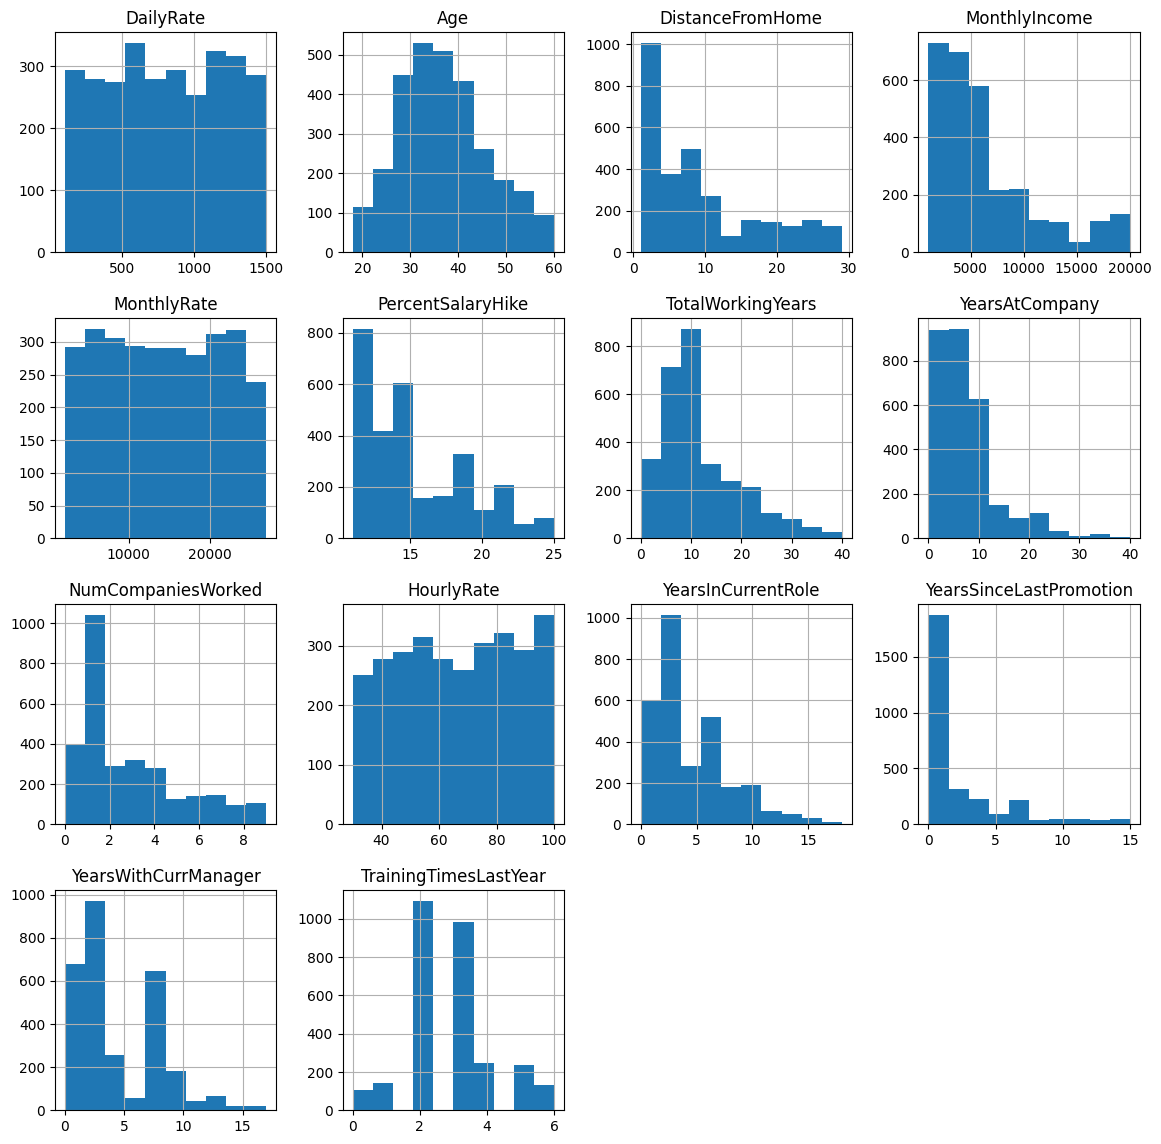

In [18]:
# Creating histograms
df[num_cols].hist(figsize = (14, 14))

plt.show()

**Observations:**

- **The age distribution is close to a normal distribution**, with the majority of employees between the ages of 25 and 50.
- **DistanceFromHome also has a right-skewed distribution**, meaning most employees live close to work but there are a few that live further away.
- **MonthlyIncome and TotalWorkingYears are skewed to the right**, indicating that the majority of workers are in entry / mid-level positions in the organization.
- **The percentage salary hike is skewed to the right**, which means employees are mostly getting lower percentage salary increaseS.
- **The YearsAtCompany variable distribution shows a good proportion of workers with 10+ years**, indicating a significant number of loyal employees at the organization. 
- **The YearsInCurrentRole distribution has three peaks at 0, 2, and 7.** There are a few employees that have even stayed in the same role for 15 years and more.
- **The YearsSinceLastPromotion variable distribution indicates that some employees have not received a promotion in 10-15 years and are still working in the organization.** These employees are assumed to be high work-experience employees in upper-management roles, such as co-founders, C-suite employees, etc.
- The distributions of DailyRate, HourlyRate, and MonthlyRate appear to be uniform and do not provide much information. It could be that the daily rate refers to the income earned per extra day worked while the hourly rate could refer to the same concept applied for extra hours worked per day. Since these rates tend to be broadly similar for multiple employees in the same department, that explains the uniform distribution they show.

### **Univariate analysis for categorical variables**

In [19]:
# Printing the % sub categories of each category.
for i in cat_cols:
    
    print(df[i].value_counts(normalize = True))
    
    print('*' * 40)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64
****************************************
No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64
****************************************
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64
****************************************
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64
****************************************
3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: Education, dtype: float64
****************************************
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64
****************************************
4    0.312245
3    0.300680
1    0.196599
2    0.

### **Observations:**

- **The employee attrition rate is ~16%.**
- **Around 28% of the employees are working overtime.** This number appears to be on the higher side and might indicate a stressed employee work-life.
- 71% of the employees have traveled rarely, while around 19% have to travel frequently.
- Around 73% of the employees come from an educational background in the Life Sciences and Medical fields. 
- Over 65% of employees work in the Research & Development department of the organization.
- **Nearly 40% of the employees have low (1) or medium-low (2) job satisfaction** and environment satisfaction in the organization, indicating that the morale of the company appears to be somewhat low.
- **Over 30% of the employees show low (1) to medium-low (2) job involvement.** 
- Over 80% of the employees either have none or very few stock options. 
- **In terms of performance ratings, none of the employees have rated lower than 3 (excellent).** About 85% of employees have a performance rating equal to 3 (excellent), while the remaining have a rating of 4 (outstanding). This could either mean that the majority of employees are top performers, or the more likely scenario is that the organization could be highly lenient with its performance appraisal process.

### <a id='eda'>Summary of EDA</a>

**Data Description:**
- There are **2940 observations and 34 columns** in the dataset.
- All the columns have 2940 non-null values, i.e., **there are no missing values in the data.**

**Observations from EDA:**

- **`EmployeeNumber` is an identifier** which is unique for each employee and **we can drop this column** as it would not add any value to our analysis.
- **`Over18` and `StandardHours` have only 1 unique value.** These columns will not add any value to our model hence we can drop them.
- **On average, the number of years since an employee got a promotion is ~2.19**. The majority of employees have been promoted since the last year.
- **The average monthly income of an employee is USD 6500.** It has a high range of values from 1K-20K USD, which is to be expected for any organization's income distribution. There is a big difference between the 3rd quartile value (around USD 8400) and the maximum value (nearly USD 20000), showing that the **company's highest earners have a disproportionately large income** in comparison to the rest of the employees. Again, this is fairly common in most organizations.
- **The `age` distribution is close to a normal distribution**, with the majority of employees between the ages of 25 and 50.
- **`DistanceFromHome` also has a right-skewed distribution**, meaning most employees live close to work but there are a few that live further away.
- **`MonthlyIncome` and `TotalWorkingYears` are skewed to the right**, indicating that the majority of workers are in entry / mid-level positions in the organization.
- **The percentage salary hike is skewed to the right**, which means employees are mostly getting lower percentage salary increaseS.
- **The `YearsAtCompany` variable distribution shows a good proportion of workers with 10+ years**, indicating a significant number of loyal employees at the organization.
- **The employee attrition rate is ~16%.**
- **Around 28% of the employees are working overtime.** This number appears to be on the higher side and might indicate a stressed employee work-life
- **Nearly 40% of the employees have low (1) or medium-low (2) job satisfaction** and environment satisfaction in the organization, indicating that the morale of the company appears to be somewhat low.

**Now that we have explored our data, let's build the model.**

## **Model Building - Approach**

1. Data preparation.
2. Partition the data into a train and test set.
3. Build a model on the train data.
4. Tune the model if required.
5. Test the data on the test set.

### **Data preparation**

**Creating dummy variables for the categorical variables**

In [20]:
# Creating a list of columns for which we will create dummy variables
to_get_dummies_for = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'JobRole']

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)      

# Mapping overtime and attrition
dict_OverTime = {'Yes': 1, 'No': 0}
dict_attrition = {'Yes': 1, 'No': 0}

df['OverTime'] = df.OverTime.map(dict_OverTime)
df['Attrition'] = df.Attrition.map(dict_attrition)

**Separating the independent variables (X) and the dependent variable (Y)**

In [21]:
# Separating the target variable and other variables

Y = df.Attrition

X = df.drop(['Attrition'], axis = 1)

**Splitting the data into 70% train and 30% test set**

In [22]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [34]:
y_train[y_train == 0].count()/y_train.count()

0.8386783284742468

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**

1. Predicting an employee will attrite when the employee doesn't attrite
2. Predicting an employee will not attrite when the employee actually attrites

**Which case is more important?**

* **Predicting that the employee will not attrite but the employee attrites**, i.e., losing out on a valuable employee or asset. This would be considered a major miss for any employee attrition predictor and is hence the more important case of wrong predictions.

**How to reduce this loss i.e the need to reduce False Negatives?**
* **The company would want the Recall to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing the Recall (minimizing the false negatives) or, in other words, identifying the true positives (i.e. Class 1) very well, so that the company can provide incentives to control the attrition rate especially, for top-performers. This would help in optimizing the overall project cost towards retaining the best talent.

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [ ]:
# Creating metric function

def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Attriate', 'Attriate'], yticklabels = ['Not Attriate', 'Attriate'])
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [4]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    
    predictors: independent variables
    
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    
    precision = precision_score(target, pred, average = 'macro')              # To compute precision
               
    acc = accuracy_score(target, pred)                                 # To compute accuracy score
    

    # Creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        
        index = [0],
    )

    return df_perf

## **Building the model**

We will be building 2 different models:

- **Decision Tree**
- **Random Forest**


### **Building a Decision Tree Model**

* We will build our model using the **DecisionTreeClassifier function.** 
* If the frequency of class A is 17% and the frequency of class B is 83%, then class B will become the dominant class and **the decision tree will become biased toward the dominant class.**
* **class_weight is a hyperparameter** for the decision tree classifier, and in this case, we can pass a dictionary {0:0.17, 1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [17]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

In [18]:
# Fitting decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

**Let's check the model performance of decision tree**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00       332

    accuracy                           1.00      2058
   macro avg       1.00      1.00      1.00      2058
weighted avg       1.00      1.00      1.00      2058



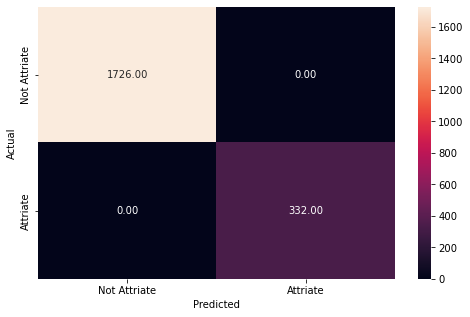

In [19]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       740
           1       0.75      0.83      0.79       142

    accuracy                           0.93       882
   macro avg       0.86      0.89      0.87       882
weighted avg       0.93      0.93      0.93       882



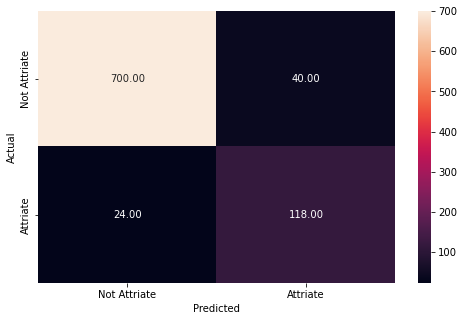

In [20]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [21]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.856843,0.888466,0.927438


**Observations:**

- The Decision Tree works well on the training data but **not so well on the test data** as the recall is 0.83 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.
- The precision on the test data suggests that there's a 25% (1 - 0.75) chance that the model will predict that a person is going to leave even though he/she would not, and **the company may waste their time and energy on these employees who are not at risk of attrition.**

**Let's plot the feature importance and check the most important features.**

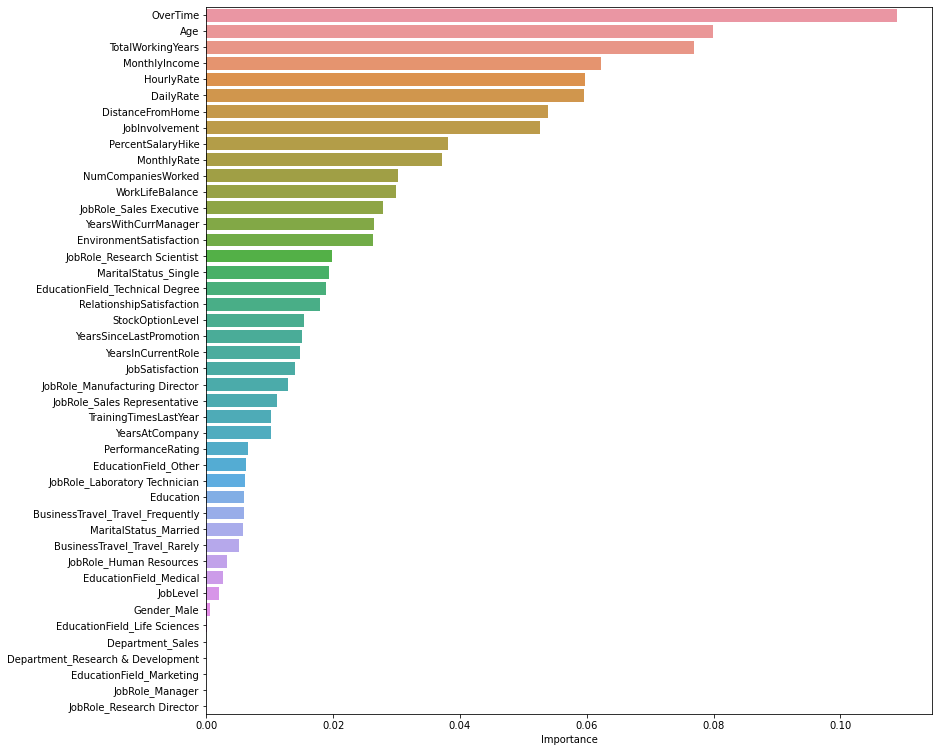

In [22]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

**Observations:**

- According to the Decision Tree, **Overtime is the most important feature, followed by Age, total working years, and Monthly income.** 
- This might signify that people who are at risk of attrition have low income, are doing overtime and have less experience. 
- The other important features are `DailyRate`, `DistanceFromHome`, `JobInvolvement`, and `PercentSalaryHike`.

**Let's try to tune the model and check if we could improve the results.**

### **Tuning Models**

### **Using GridSearch for Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion{“gini”,  “entropy”}**

The function is to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

In [23]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=2,
                       min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1726
           1       0.32      0.68      0.43       332

    accuracy                           0.71      2058
   macro avg       0.62      0.70      0.62      2058
weighted avg       0.82      0.71      0.75      2058



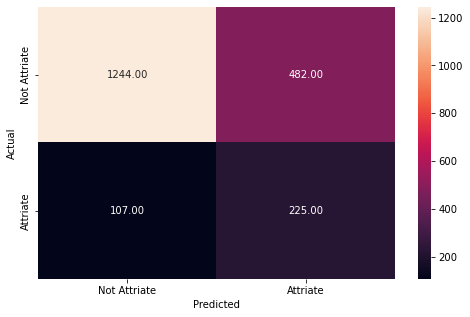

In [24]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- In comparison to the model with default values of hyperparameters, **the performance on the training set has gone down significantly.** This makes sense because we are trying to reduce overfitting.

              precision    recall  f1-score   support

           0       0.91      0.71      0.80       740
           1       0.29      0.61      0.39       142

    accuracy                           0.70       882
   macro avg       0.60      0.66      0.59       882
weighted avg       0.81      0.70      0.73       882



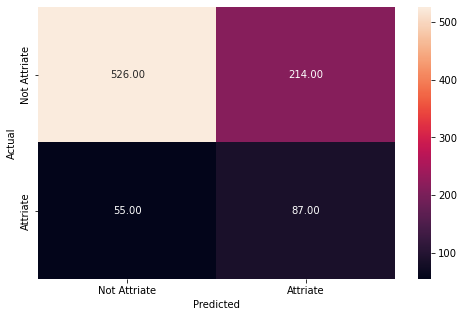

In [25]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [26]:
dtree_tuned_test = model_performance_classification(dtree_estimator,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.597186,0.661743,0.695011


**Observations:**

- The tuned model is not performing well in comparison to the model with default values of hyperparameters.
- This model is not overfitting the training data and giving approximately the same result on the test and train datasets.
- Precision has gone down significantly from .75 to .29 in comparison to the previous model which means the tuned model will give a high number of false positives, i.e., this model will predict the employee is going to leave even if they won't, and this will cost time and effort to the company.

**Let's look at the feature importance of this model and try to analyze why this is happening.**

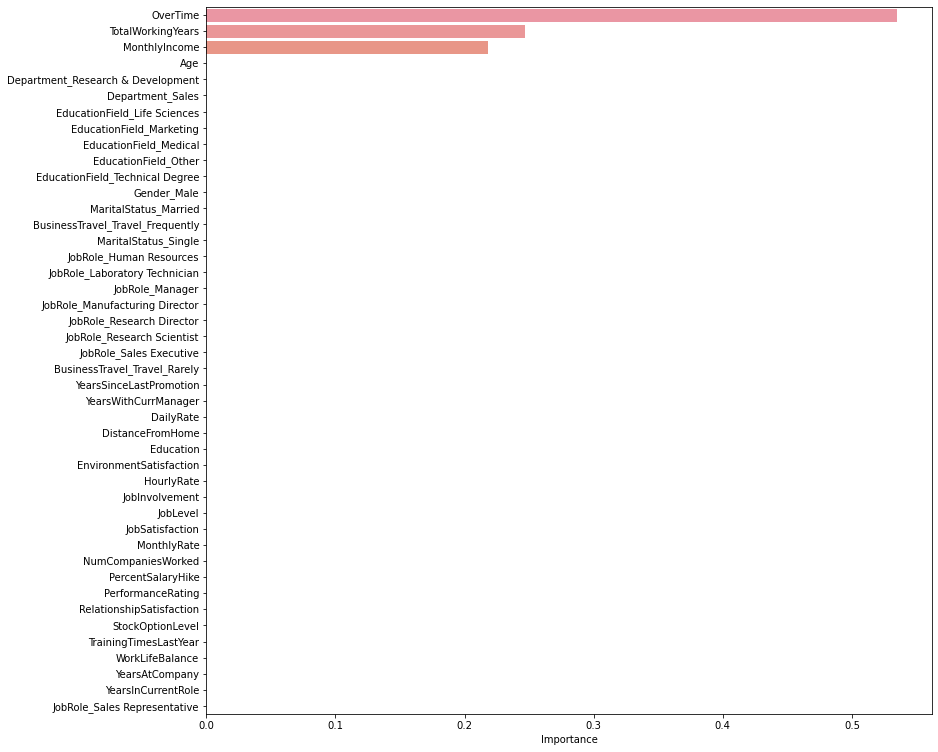

In [27]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

**Observations:**

- After tuning the model we are getting that only 3 features are important. It seems like **the model is having high bias**, as it has over-simplified the problem and is not capturing the patterns associated with other variables.
- According to this model too, `OverTime`, `TotalWorkingYears`, and `MonthlyIncome` are the 3 most important features that describe why an employee is leaving the organization, which might imply that employees doing overtime may feel that their remuneration is not enough for their efforts.

**Let's plot the tree** and check if the assumptions about overtime income.

As we know the decision tree keeps growing until the nodes are homogeneous, i.e., it has only one class, and the dataset here has a lot of features, it would be hard to visualize the whole tree with so many features. Therefore, we are only visualizing the tree up to **max_depth = 4**.

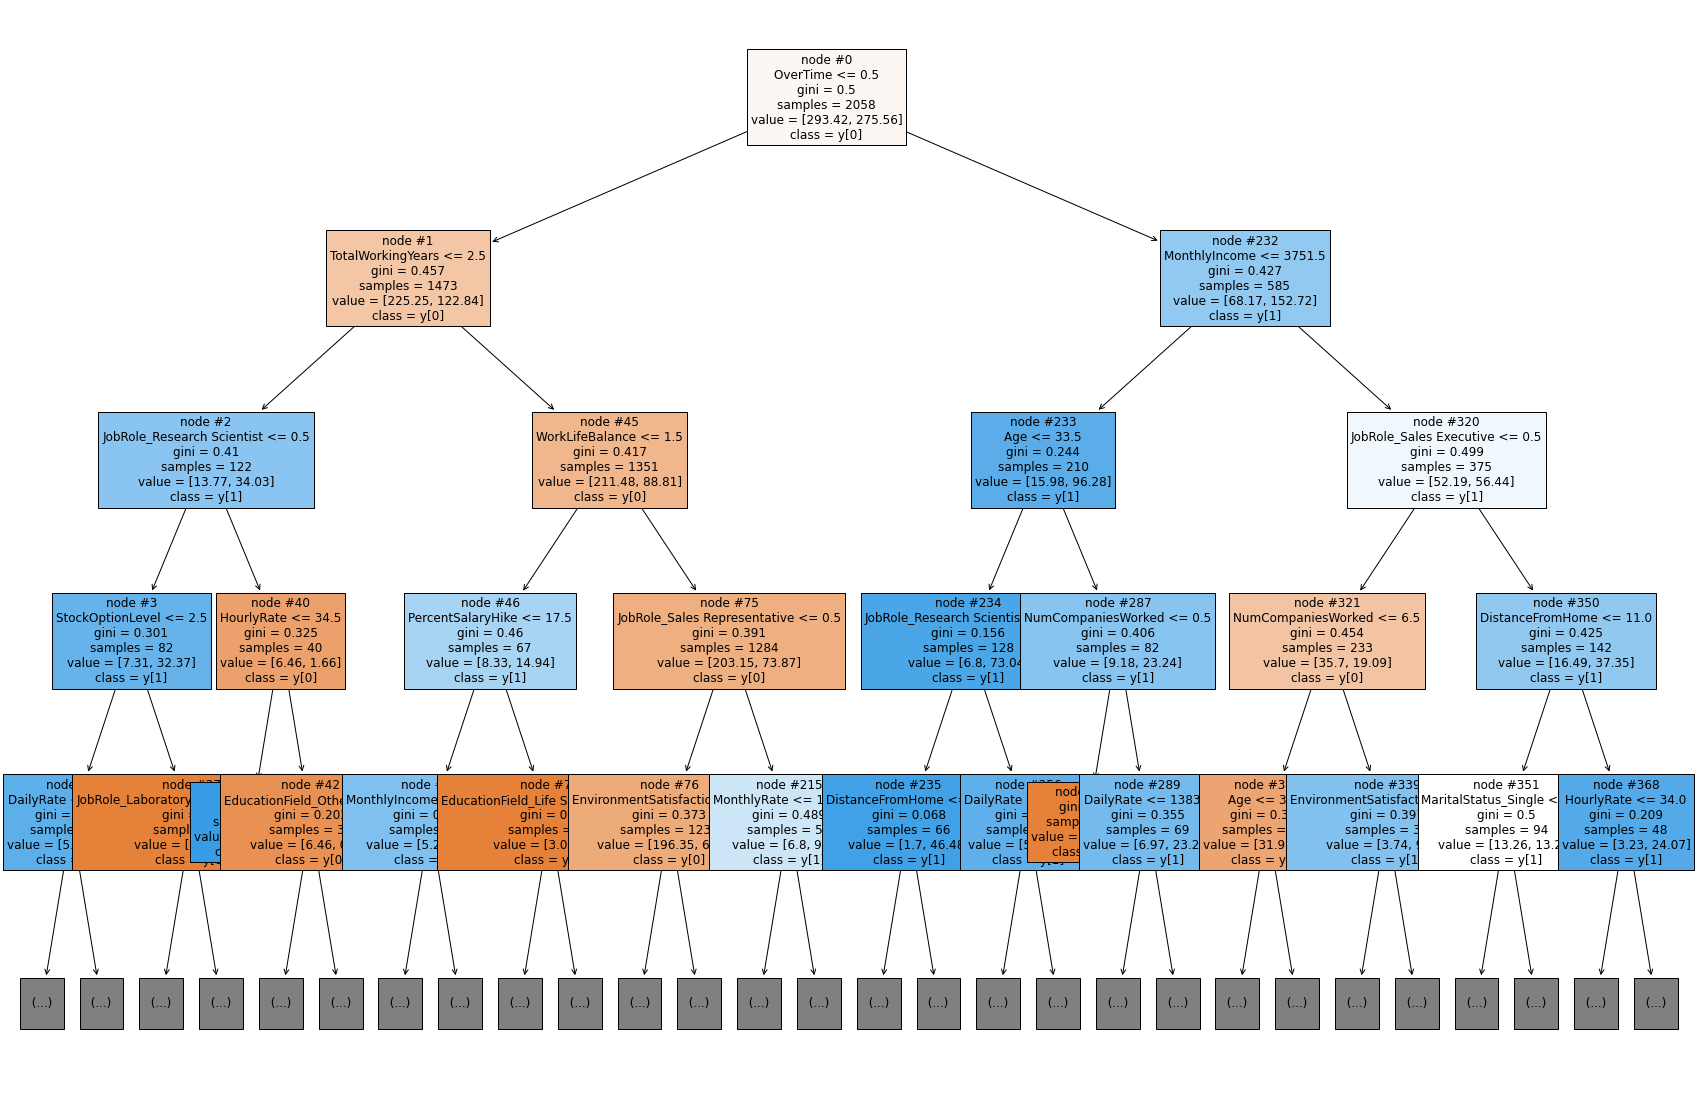

In [28]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

### **Note:**

Blue leaves represent the attrition, i.e., **y[1]** and the orange leaves represent the non-attrition, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:**

- Employees who are doing overtime with low salaries and low age have a chance of leaving the company, as they might feel overworked and underpaid and might be looking for better opportunities.
- Employees who are doing overtime with low salaries and are not research scientists have a high chance of attriting. 
- Employees, even if they have an income over 3751.5 units but working as sales executives and living far from home have a high chance of attriting.
- Another segment of people are who are doing overtime, with ages younger than 33.5 and not working as research scientists, have a greater chance of attrition. This implies that the model suggests except for the research scientist role, everyone who is young has a high tendency to attrite.
- Employees who have over 2.5 years of work experience but low work-life balance and low percentage hike also tend to attrite, probably as they are seeking a more balanced life.
- Employees who are not doing overtime, have low experience and are working as research scientists have a smaller chance of attriting. These employees are comfortable or loyal to the organization.
- `Numcompaniesworked` also seems to be an important variable in predicting if an employee's likely to attrite.

### **Building the Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample, a decision tree makes a prediction. 

**The results from all the decision trees are combined and the final prediction is made using voting (for classification problems) or averaging (for regression problems).**

In [29]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00       332

    accuracy                           1.00      2058
   macro avg       1.00      1.00      1.00      2058
weighted avg       1.00      1.00      1.00      2058



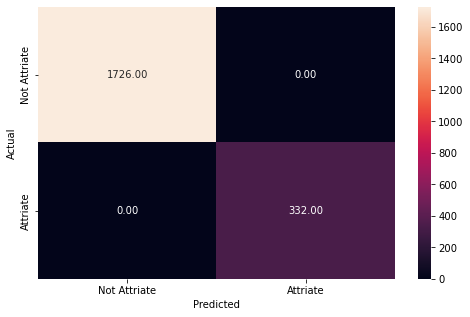

In [30]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**

- The Random Forest is giving a **100% score for all metrics on the training dataset.** 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       740
           1       0.93      0.79      0.85       142

    accuracy                           0.96       882
   macro avg       0.95      0.89      0.91       882
weighted avg       0.96      0.96      0.96       882



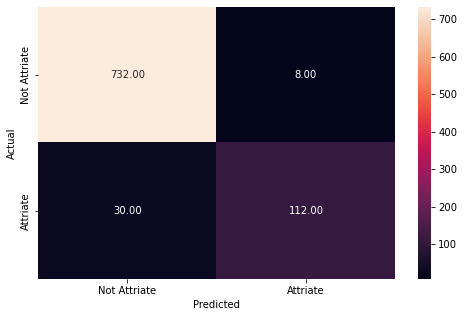

In [31]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [32]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.946982,0.888961,0.956916


**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the recall on the test data is only ~ 0.80 for class 1.
- Precision is high for the test data as well. 

**Let's check the feature importance of the Random Forest**

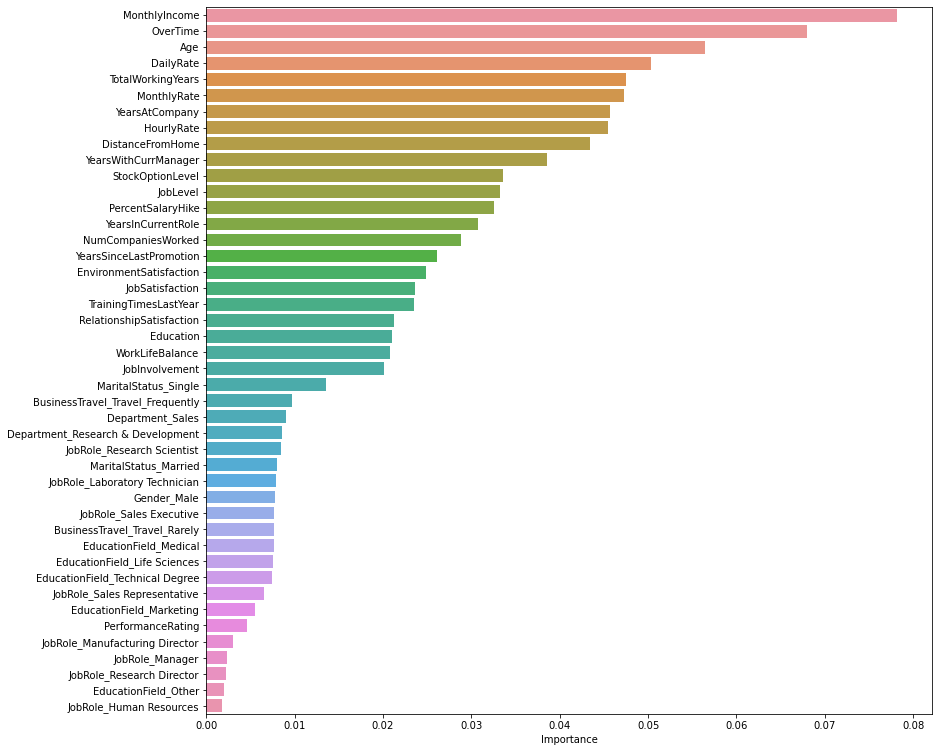

In [33]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

**Observations:**


- The Random Forest further verifies the results from the decision tree that the most important features are `MonthlyIncome`, `Age`, `OverTime`.
- We can say that the people appear to be leaving the organization because of the overtime they are doing andh s because they are not paid accordingly. These might be mostly junior-level and mid-level employees with less experience. 
- Distance from home is also a key feature, probably as employees living far from the office have to travel a lot, making their schedules hectic.
- Not having stock options is also a driver for attrition - this feature seems to have good importance in both the decision tree and random forest models. This could be related to the junior level employees and their lack of stock options - with the additional burden of a lower salary and working overtime, those without stock options could also be attriting more.
- Other features like, number of companies worked and percent salary hike also seem to be intuitive in explaining attrition likelihood, as people who have worked in a large number of companies are probably not going to stay loyal to the current organization and may have a high risk of attrition, while if an employee is not getting enough of a salary hike, that might demotivate them and lead to a higher likelihood of attriting as well.
- Other features such as job satisfaction, environment satisfaction and their job level also play a crucial role in knowing whether an employee will attrite or not.

### **Tuning the Random Forest classifier**

**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node.

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

In [34]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [35]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, max_features=0.9,
                       min_samples_leaf=3, n_estimators=250, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       0.99      1.00      1.00       332

    accuracy                           1.00      2058
   macro avg       1.00      1.00      1.00      2058
weighted avg       1.00      1.00      1.00      2058



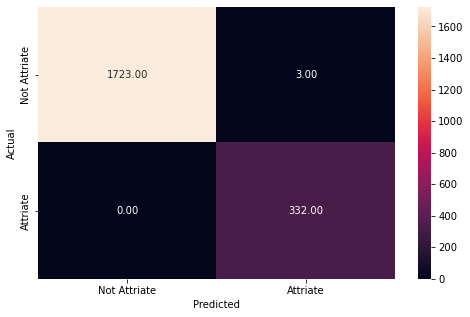

In [36]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       740
           1       0.87      0.83      0.85       142

    accuracy                           0.95       882
   macro avg       0.92      0.90      0.91       882
weighted avg       0.95      0.95      0.95       882



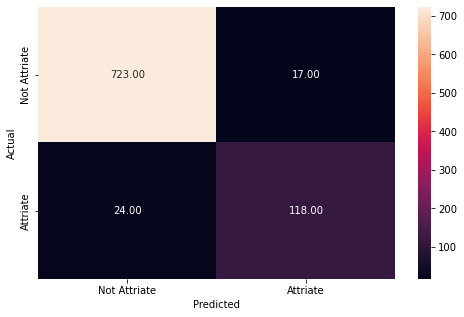

In [37]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [38]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.920973,0.904006,0.953515


**Observations:**

- The tuned model is also slightly overfitting the training dataset, but **it shows a good performance on the test dataset.**
- **The recall for class 1 has improved with a small decrease in precision**. 
- **This model is the best-performing one among all the models so far,** and is giving us good precision and recall scores on the test dataset.

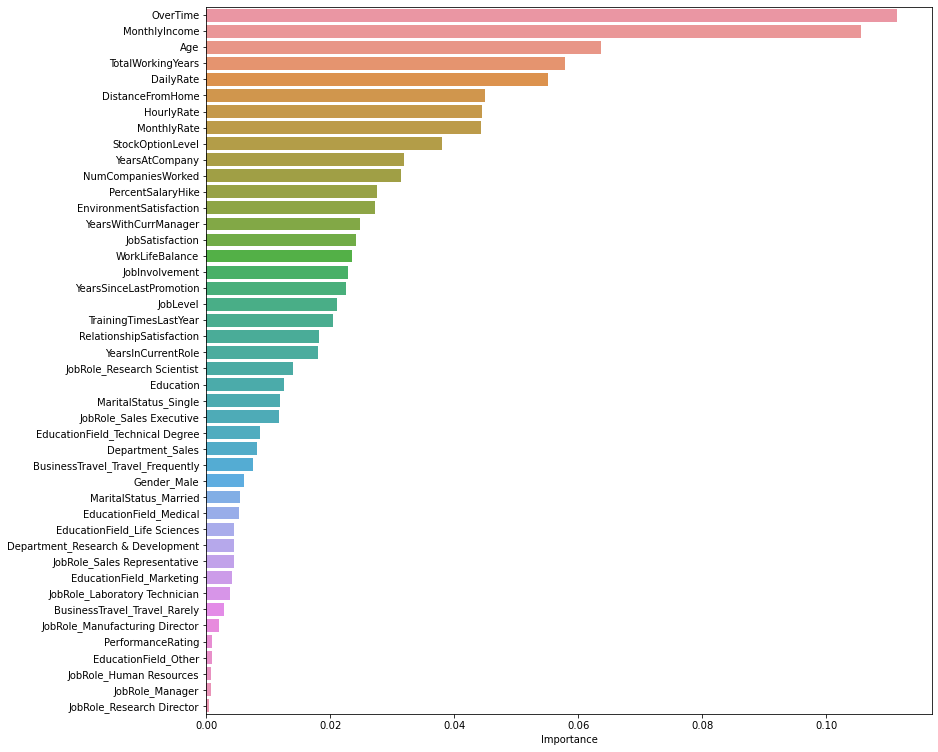

In [39]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

**Observations:**

- **The feature importance plot for the base model and tuned model are quite similar.** The model seems to suggest that `OverTime`, `MonthlyIncome`, `Age`,`TotalWorkingYears`, and `DailyRate` are the most important features.
- Other important features are DistanceFromHome, StockOptionLevel, YearsAt Company, and NumCompaniesWorked.

## **Conclusion**

- The best model we have got so far is the tuned random forest model which is giving nearly ~ 83% recall for class 1 on the test data. 
- The company should use this model to know beforehand which employee is going to attrite and act accordingly. 
- Overtime, MonthlyIncome, DailyRate, number of companies worked, and work experience/age seem to be the most important features.

## **Recommendations**

- We saw that **working overtime is the most important driver of attrition.** The organization should manage their work more efficiently so that employees don't have to work overtime and can manage to have a work-life balance, failing to do this, the company could provide some additional incentives to employees who are working overtime in order to retain them.
- **A higher monthly income might lower the odds of an employee attriting.** The company should make sure that all its employees are compensated at least based on industry standards.
- As observed earlier, the organization has a lower **percentage salary hike** and promotions are given less frequently. The company might be able to focus on **giving promotions more frequently** or they could **increase the annual appraisal hike** to incentivize employees to stay.
- The organization could come up with a **revised CTC plan with stock options for the employees** in order to keep them motivated and invested in the company's performance. 
- The organization should also modify its hiring policy as people who have worked in many companies and have switched a lot, should not be hired very often.
- Distance from home is also an important factor for attrition. Employees traveling a larger distance to reach the workplace are the ones attriting. For such employees, the company can provide cab facilities so that the commute of employees gets easier.
- The company should also keep track of the hourly rate or the daily rate, so that when the employees need to stay overtime for extra work they are well compensated for that.
- The organization should focus on improving the culture and environment at the workplace by coming up with new ideas to make the environment more open and friendly.
- Keeping track of the problems which employees with lesser experience face and how the management can help them, will create a healthy environment for the young employees.
- The organization should also focus on the employees who are working in sales and marketing, as attrition rate is quite high for these departments. Perhaps the company could look into their incentive schemes and try to come up with new incentive methods to motivate them to stay.

## **Additional Content (Optional)**

## **Boosting Models**

Let's now look at the other kind of Ensemble technique knowns as Boosting

### **XGBoost**
- XGBoost stands for Extreme Gradient Boosting.
- XGBoost is a tree-based ensemble machine learning technique that improves prediction power and performance by improvising on the Gradient Boosting framework and incorporating reliable approximation algorithms. It is widely utilized and routinely appears at the top of competition leader boards in data science.

In [40]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

In [41]:
# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

In [42]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1)

# Fitting the model
adaboost_model.fit(x_train, y_train)

# Model Performance on the test data
adaboost_model_perf_test = model_performance_classification(adaboost_model,x_test,y_test)


adaboost_model_perf_test

,Precision,Recall,Accuracy
0,0.814518,0.709136,0.884354


In [43]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1)

# Fitting the model
gbc.fit(x_train, y_train)

# Model Performance on the test data
gbc_perf_test = model_performance_classification(gbc, x_test, y_test)

gbc_perf_test

,Precision,Recall,Accuracy
0,0.882845,0.728483,0.902494


In [44]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(x_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_classification(xgb,x_test,y_test)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.910274,0.724819,0.905896


### **Hyperparameter Tuning: Boosting**

Hyperparameter tuning is a great technique in machine learning to develop the model with optimal parameters. If the size of the data increases, the computation time will increase during the training process.
- For practice purposes, we have listed below some of the important hyperparameters for each algorithm that can be tuned to improve the model performance.

**1. Adaboost**

- - Some important hyperparameters that can be tuned:

 - **base_estimator** object, default = None
The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1

  - **n_estimators** int, default = 50
  The maximum number of estimators at which boosting is terminated. In the case of a perfect fit, the learning procedure is stopped early.

 - **learning_rate** float, default = 1.0
Weight is applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier.

For a better understanding of each parameter in the AdaBoost classifier, please refer to this[source](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html).

**2. Gradient Boosting Algorithm**

- - Some important hyperparameters that can be tuned:

 - **n_estimators**: The number of boosting stages that will be performed.
 
 - **max_depth**: Limits the number of nodes in the tree. The best value depends on the interaction of the input variables.

  - **min_samples_split**: The minimum number of samples required to split an internal node.

  - **learning_rate**: How much the contribution of each tree will shrink.

  - **loss**:Loss function to optimize. 

For a better understanding of each parameter in the Gradient Boosting classifier, please refer to this [source](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).


**3. XGBoost Algorithm**

- - Some important hyperparameters that can be tuned:

 - **booster** [default = gbtree ] Which booster to use. Can be gbtree, gblinear, or dart; gbtree and dart use tree-based models while gblinear uses linear functions.
 
 - **min_child_weight** [default = 1]

   The minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning.The larger min_child_weight is, the more conservative the algorithm will be.

  For a better understanding of each parameter in the XGBoost Classifier, please refer to this [source](https://xgboost.readthedocs.io/en/stable/parameter.html).

### **Comparison of all the models we have built so far**

In [45]:
models_test_comp_df = pd.concat(
    
    [    
    dtree_test.T, dtree_tuned_test.T,rf_estimator_test.T,
    rf_estimator_tuned_test.T, adaboost_model_perf_test.T,
    gbc_perf_test.T, xgb_perf_test.T
    ],
    
    axis = 1,
)

models_test_comp_df.columns = [
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier",
    "Adaboost classifier",
    "Gradientboost classifier",
    "XGBoost classifier"
]

print("Test performance comparison:")

Test performance comparison:


In [46]:
models_test_comp_df

,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier,Adaboost classifier,Gradientboost classifier,XGBoost classifier
Precision,0.856843,0.597186,0.946982,0.920973,0.814518,0.882845,0.910274
Recall,0.888466,0.661743,0.888961,0.904006,0.709136,0.728483,0.724819
Accuracy,0.927438,0.695011,0.956916,0.953515,0.884354,0.902494,0.905896


**Observations:**

* **The Tuned Random Forest gives the best performance for this dataset.**
* **In boosting algorithms, XGBoost has given good score amoong other algorithms.**